In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

file_1 = "Resources/1_county_data.csv"
file_2 = "Resources/2_directory.csv"
file_3 = "Resources/4_zip_codes_us_only.csv"

In [2]:
df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)
df_3 = pd.read_csv(file_3)

In [3]:
clean_df_1 = df_1[["State", "TotalPop", "WorkAtHome", "Employed","Unemployment", "Men", "Women", "Income", "IncomePerCap", "Poverty" ]].copy()
GrBy_Sum = clean_df_1.groupby("State").sum()
Avg_By = clean_df_1.groupby("State").mean()

clean_df_1 = pd.DataFrame({
    "TotalPop" : GrBy_Sum["TotalPop"],
    "WorkAtHome" : Avg_By["WorkAtHome"],
    "Employed" : (GrBy_Sum["Employed"] / GrBy_Sum["TotalPop"])*100,
    "Unemployment" : Avg_By["Unemployment"],
"Men": GrBy_Sum ["Men"], "Women": GrBy_Sum ["Women"], "Income": Avg_By ["Income"], "IncomePerCap": Avg_By["IncomePerCap"], "Poverty": Avg_By ["Poverty"] }).reset_index()
clean_df_1

,State,TotalPop,WorkAtHome,Employed,Unemployment,Men,Women,Income,IncomePerCap,Poverty
0,Alabama,4850771,2.528358,42.374893,9.023881,2350806,2499965,40271.402985,22180.492537,20.949254
1,Alaska,738565,5.455172,47.936878,9.655172,386319,352246,66425.448276,31670.551724,13.555172
2,Arizona,6809946,5.033333,43.376130,9.766667,3385055,3424891,45816.666667,22712.200000,20.193333
3,Arkansas,2977944,3.250667,42.866353,7.292000,1461651,1516293,39025.080000,21449.306667,20.421333
4,California,38982847,6.668966,46.158545,8.265517,19366579,19616268,61046.758621,30416.482759,15.737931
5,Colorado,5436519,8.025000,50.769178,5.793750,2731315,2705204,54353.562500,29647.046875,13.234375
6,Connecticut,3594478,4.862500,50.218307,6.775000,1754046,1840432,74496.000000,39419.125000,9.200000
7,Delaware,943732,4.666667,46.783727,6.433333,456876,486856,61294.666667,31278.333333,12.300000
8,District of Columbia,672391,5.700000,53.198362,8.000000,319046,353345,77649.000000,50832.000000,17.400000
9,Florida,20278447,5.008955,44.473672,7.765672,9914361,10364086,47144.328358,25265.970149,17.150746


In [4]:
clean_df_2 = df_2[["Store Number", "State/Province", "Country", "Longitude","Latitude"]].copy()
clean_df_2 = clean_df_2.loc[clean_df_2["Country"]=="US"].drop(columns="Country")
clean_df_2

,Store Number,State/Province,Longitude,Latitude
11964,3513-125945,AK,-149.78,61.21
11965,74352-84449,AK,-149.84,61.14
11966,12449-152385,AK,-149.85,61.11
11967,24936-233524,AK,-149.89,61.13
11968,8973-85630,AK,-149.86,61.14
...,...,...,...,...
25567,74385-87621,WY,-105.59,41.32
25568,73320-24375,WY,-105.56,41.31
25569,22425-219024,WY,-105.56,41.31
25570,10849-103163,WY,-109.25,41.58


In [5]:
clean_df_2.rename(columns={"State/Province": "state_id"},inplace=True)
clean_df_2

,Store Number,state_id,Longitude,Latitude
11964,3513-125945,AK,-149.78,61.21
11965,74352-84449,AK,-149.84,61.14
11966,12449-152385,AK,-149.85,61.11
11967,24936-233524,AK,-149.89,61.13
11968,8973-85630,AK,-149.86,61.14
...,...,...,...,...
25567,74385-87621,WY,-105.59,41.32
25568,73320-24375,WY,-105.56,41.31
25569,22425-219024,WY,-105.56,41.31
25570,10849-103163,WY,-109.25,41.58


In [6]:
df_3.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,1001,42.06258,-72.62590,Agawam,MA,Massachusetts,True,NaN,17621,562.8,25013,Hampden,{'25013':100},Hampden,25013,False,False,America/New_York
1,1002,42.37492,-72.46210,Amherst,MA,Massachusetts,True,NaN,30066,203.7,25015,Hampshire,"{'25011':0.97,'25015':99.03}",Hampshire|Franklin,25015|25011,False,False,America/New_York
2,1003,42.39192,-72.52479,Amherst,MA,Massachusetts,True,NaN,11238,5629.7,25015,Hampshire,{'25015':100},Hampshire,25015,False,False,America/New_York
3,1005,42.42018,-72.10615,Barre,MA,Massachusetts,True,NaN,4991,44.3,25027,Worcester,{'25027':100},Worcester,25027,False,False,America/New_York
4,1007,42.27875,-72.40036,Belchertown,MA,Massachusetts,True,NaN,14967,107.5,25015,Hampshire,{'25015':100},Hampshire,25015,False,False,America/New_York


In [7]:
zip_gr = df_3.groupby(["state_id","state_name"]).count()["zip"]
state_df = pd.DataFrame(zip_gr).reset_index().drop(columns="zip")
state_df.rename(columns={"state_name": "State"},inplace=True)
# state_df

In [8]:
merge_df = state_df.merge(clean_df_1, on="State", how="left")
merge_df

,state_id,State,TotalPop,WorkAtHome,Employed,Unemployment,Men,Women,Income,IncomePerCap,Poverty
0,AK,Alaska,738565,5.455172,47.936878,9.655172,386319,352246,66425.448276,31670.551724,13.555172
1,AL,Alabama,4850771,2.528358,42.374893,9.023881,2350806,2499965,40271.402985,22180.492537,20.949254
2,AR,Arkansas,2977944,3.250667,42.866353,7.292000,1461651,1516293,39025.080000,21449.306667,20.421333
3,AZ,Arizona,6809946,5.033333,43.376130,9.766667,3385055,3424891,45816.666667,22712.200000,20.193333
4,CA,California,38982847,6.668966,46.158545,8.265517,19366579,19616268,61046.758621,30416.482759,15.737931
5,CO,Colorado,5436519,8.025000,50.769178,5.793750,2731315,2705204,54353.562500,29647.046875,13.234375
6,CT,Connecticut,3594478,4.862500,50.218307,6.775000,1754046,1840432,74496.000000,39419.125000,9.200000
7,DE,Delaware,943732,4.666667,46.783727,6.433333,456876,486856,61294.666667,31278.333333,12.300000
8,FL,Florida,20278447,5.008955,44.473672,7.765672,9914361,10364086,47144.328358,25265.970149,17.150746
9,GA,Georgia,10201635,3.611321,45.152850,8.053459,4968887,5232748,43268.786164,22305.301887,21.192453


In [9]:
final_df = clean_df_2.merge(merge_df, on="state_id", how="left")
final_df

,Store Number,state_id,Longitude,Latitude,State,TotalPop,WorkAtHome,Employed,Unemployment,Men,Women,Income,IncomePerCap,Poverty
0,3513-125945,AK,-149.78,61.21,Alaska,738565.0,5.455172,47.936878,9.655172,386319.0,352246.0,66425.448276,31670.551724,13.555172
1,74352-84449,AK,-149.84,61.14,Alaska,738565.0,5.455172,47.936878,9.655172,386319.0,352246.0,66425.448276,31670.551724,13.555172
2,12449-152385,AK,-149.85,61.11,Alaska,738565.0,5.455172,47.936878,9.655172,386319.0,352246.0,66425.448276,31670.551724,13.555172
3,24936-233524,AK,-149.89,61.13,Alaska,738565.0,5.455172,47.936878,9.655172,386319.0,352246.0,66425.448276,31670.551724,13.555172
4,8973-85630,AK,-149.86,61.14,Alaska,738565.0,5.455172,47.936878,9.655172,386319.0,352246.0,66425.448276,31670.551724,13.555172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,74385-87621,WY,-105.59,41.32,Wyoming,583200.0,5.860870,50.348594,4.282609,298301.0,284899.0,59065.217391,30665.434783,11.226087
13604,73320-24375,WY,-105.56,41.31,Wyoming,583200.0,5.860870,50.348594,4.282609,298301.0,284899.0,59065.217391,30665.434783,11.226087
13605,22425-219024,WY,-105.56,41.31,Wyoming,583200.0,5.860870,50.348594,4.282609,298301.0,284899.0,59065.217391,30665.434783,11.226087
13606,10849-103163,WY,-109.25,41.58,Wyoming,583200.0,5.860870,50.348594,4.282609,298301.0,284899.0,59065.217391,30665.434783,11.226087


In [10]:
store_count = final_df.groupby("State").count()["Store Number"]
# store_count

In [11]:
#Create dataframe to grouby state
state_group=final_df.groupby('State')
# Datafrme for no of stores per state
Store_state=pd.DataFrame(state_group['Store Number'].count())
# Store_state


In [12]:
analysis_merge_df = pd.merge(Store_state, merge_df, on="State", how="left")
analysis_merge_df

,State,Store Number,state_id,TotalPop,WorkAtHome,Employed,Unemployment,Men,Women,Income,IncomePerCap,Poverty
0,Alabama,85,AL,4850771,2.528358,42.374893,9.023881,2350806,2499965,40271.402985,22180.492537,20.949254
1,Alaska,49,AK,738565,5.455172,47.936878,9.655172,386319,352246,66425.448276,31670.551724,13.555172
2,Arizona,488,AZ,6809946,5.033333,43.376130,9.766667,3385055,3424891,45816.666667,22712.200000,20.193333
3,Arkansas,55,AR,2977944,3.250667,42.866353,7.292000,1461651,1516293,39025.080000,21449.306667,20.421333
4,California,2821,CA,38982847,6.668966,46.158545,8.265517,19366579,19616268,61046.758621,30416.482759,15.737931
5,Colorado,481,CO,5436519,8.025000,50.769178,5.793750,2731315,2705204,54353.562500,29647.046875,13.234375
6,Connecticut,123,CT,3594478,4.862500,50.218307,6.775000,1754046,1840432,74496.000000,39419.125000,9.200000
7,Delaware,25,DE,943732,4.666667,46.783727,6.433333,456876,486856,61294.666667,31278.333333,12.300000
8,Florida,694,FL,20278447,5.008955,44.473672,7.765672,9914361,10364086,47144.328358,25265.970149,17.150746
9,Georgia,326,GA,10201635,3.611321,45.152850,8.053459,4968887,5232748,43268.786164,22305.301887,21.192453


In [13]:
def plot_scatter(x, y, name):
    plt.scatter(X, Y)
    plt.title(name[0])
    plt.xlabel(name[1])
    plt.ylabel(name[2])
    plt.show()

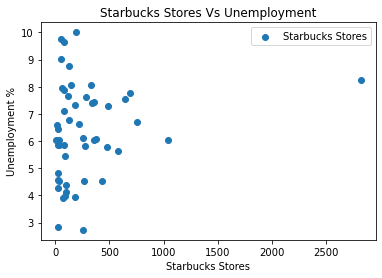

In [42]:
# Scatter plot: No of stores vs Unemployment
plt.scatter(Store_state['Store Number'], merge_df['Unemployment'])
plt.title("Starbucks Stores Vs Unemployment")
plt.xlabel("Starbucks Stores")
plt.ylabel("Unemployment %")
legend_name=["Starbucks Stores"]
plt.legend(legend_name,loc="best")
plt.savefig("images/Number_of_Stores_unemploy.png")
plt.show()

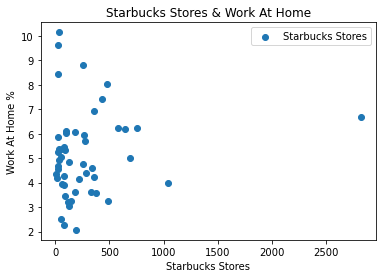

In [41]:
# Scatter plot: No of stores vs Working from Home
plt.scatter(Store_state['Store Number'], merge_df['WorkAtHome'])
plt.title("Starbucks Stores & Work At Home")
plt.xlabel("Starbucks Stores")
plt.ylabel("Work At Home %")
legend_name=["Starbucks Stores"]
plt.legend(legend_name,loc="best")
plt.savefig("images/Number_of_Stores_workathome.png")
plt.show()


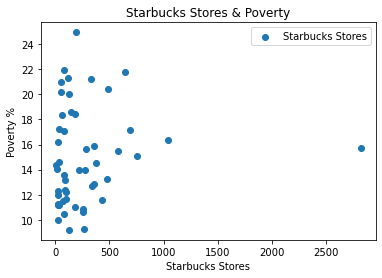

In [40]:
# Scatter plot: No of stores vs poverty
plt.scatter(Store_state['Store Number'], merge_df['Poverty'])
plt.title("Starbucks Stores & Poverty")
plt.xlabel("Starbucks Stores")
plt.ylabel("Poverty %")
legend_name=["Starbucks Stores"]
plt.legend(legend_name,loc="best")
plt.savefig("images/Number_of_Stores_Poverty.png")
plt.show()

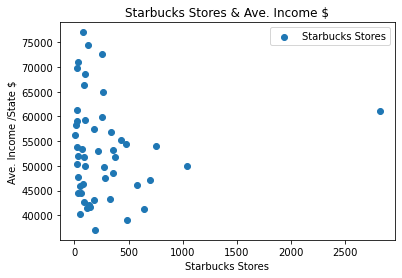

In [39]:
# Scatter plot: No of stores vs Ave Income
plt.scatter(Store_state['Store Number'], merge_df['Income'])
plt.title("Starbucks Stores & Ave. Income $")
plt.xlabel("Starbucks Stores")
plt.ylabel("Ave. Income /State $")
legend_name=["Starbucks Stores"]
plt.legend(legend_name,loc="best")
plt.savefig("images/Number_of_Stores_Income.png")
plt.show()

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Stores = analysis_merge_df['Store Number']
Ave_Income=analysis_merge_df['Income']
correlation = st.pearsonr(Stores,Ave_Income)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(Stores, Ave_Income)
regress_values = Stores* slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")

The correlation between both factors is 0.09
The equation of the line fitted through the data is: y = 2.1x + 52573.67


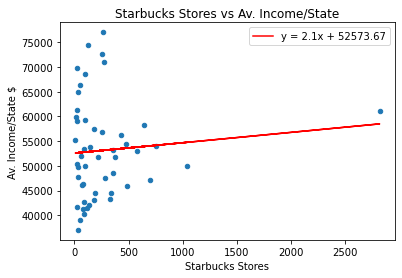

In [37]:
# Add the linear regression equation and line to plot

analysis_merge_df.plot(kind='scatter', x='Store Number', y='Income')
plt.plot(analysis_merge_df['Store Number'],regress_values,"r-", label=line_eq)
plt.legend()
# plt.legend(legend_name,loc="best")
plt.xlabel('Starbucks Stores')
plt.title('Starbucks Stores vs Av. Income/State')
plt.ylabel('Av. Income/State $')
plt.savefig("images/corr_line_regression_income.png")
plt.show()

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Stores = analysis_merge_df['Store Number']
Total_Pop=analysis_merge_df['TotalPop']
correlation = st.pearsonr(Stores,Total_Pop)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(Stores, Total_Pop)
regress_values = Stores* slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")

The correlation between both factors is 0.9
The equation of the line fitted through the data is: y = 15112.05x + 2321248.35


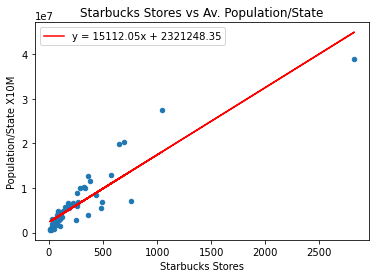

In [33]:
# Add the linear regression equation and line to plot
analysis_merge_df.plot(kind='scatter', x='Store Number', y='TotalPop')
plt.plot(analysis_merge_df['Store Number'],regress_values,"r-", label=line_eq)
plt.legend()
# plt.legend(legend_name,loc="best")
plt.xlabel('Starbucks Stores')
plt.title('Starbucks Stores vs Av. Population/State')
plt.ylabel('Population/State X10M')
plt.savefig("images/corr_line_regression_TotalPop.png")

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Stores = analysis_merge_df['Store Number']
Men_Pop=analysis_merge_df['Men']
correlation = st.pearsonr(Stores,Men_Pop)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(Stores, Men_Pop)
regress_values = Stores* slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")

The correlation between both factors is 0.91
The equation of the line fitted through the data is: y = 7490.81x + 1128928.29


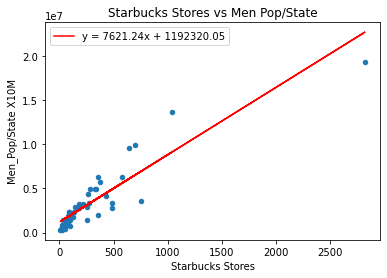

In [30]:
# Add the linear regression equation and line to plot
analysis_merge_df.plot(kind='scatter', x='Store Number', y='Men')
plt.plot(analysis_merge_df['Store Number'],regress_values,"r-", label=line_eq)
plt.legend()
# plt.legend(legend_name,loc="best")
plt.xlabel('Starbucks Stores')
plt.title('Starbucks Stores vs Men Pop/State')
plt.ylabel('Men_Pop/State X10M')
plt.savefig("images/corr_line_regression_Men_Pop.png")

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Stores = analysis_merge_df['Store Number']
Women_Pop=analysis_merge_df['Women']
correlation = st.pearsonr(Stores, Women_Pop)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(Stores, Women_Pop)
regress_values = Stores* slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")

The correlation between both factors is 0.9
The equation of the line fitted through the data is: y = 7621.24x + 1192320.05


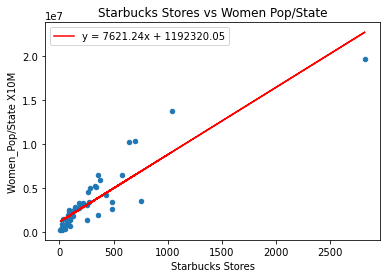

In [29]:
# Add the linear regression equation and line to plot
analysis_merge_df.plot(kind='scatter', x='Store Number', y='Women')
plt.plot(analysis_merge_df['Store Number'],regress_values,"r-", label=line_eq)
plt.legend()
# plt.legend(legend_name,loc="best")
plt.xlabel('Starbucks Stores')
plt.title('Starbucks Stores vs Women Pop/State')
plt.ylabel('Women_Pop/State X10M')
plt.savefig("images/corr_line_regression_Women_Pop.png")

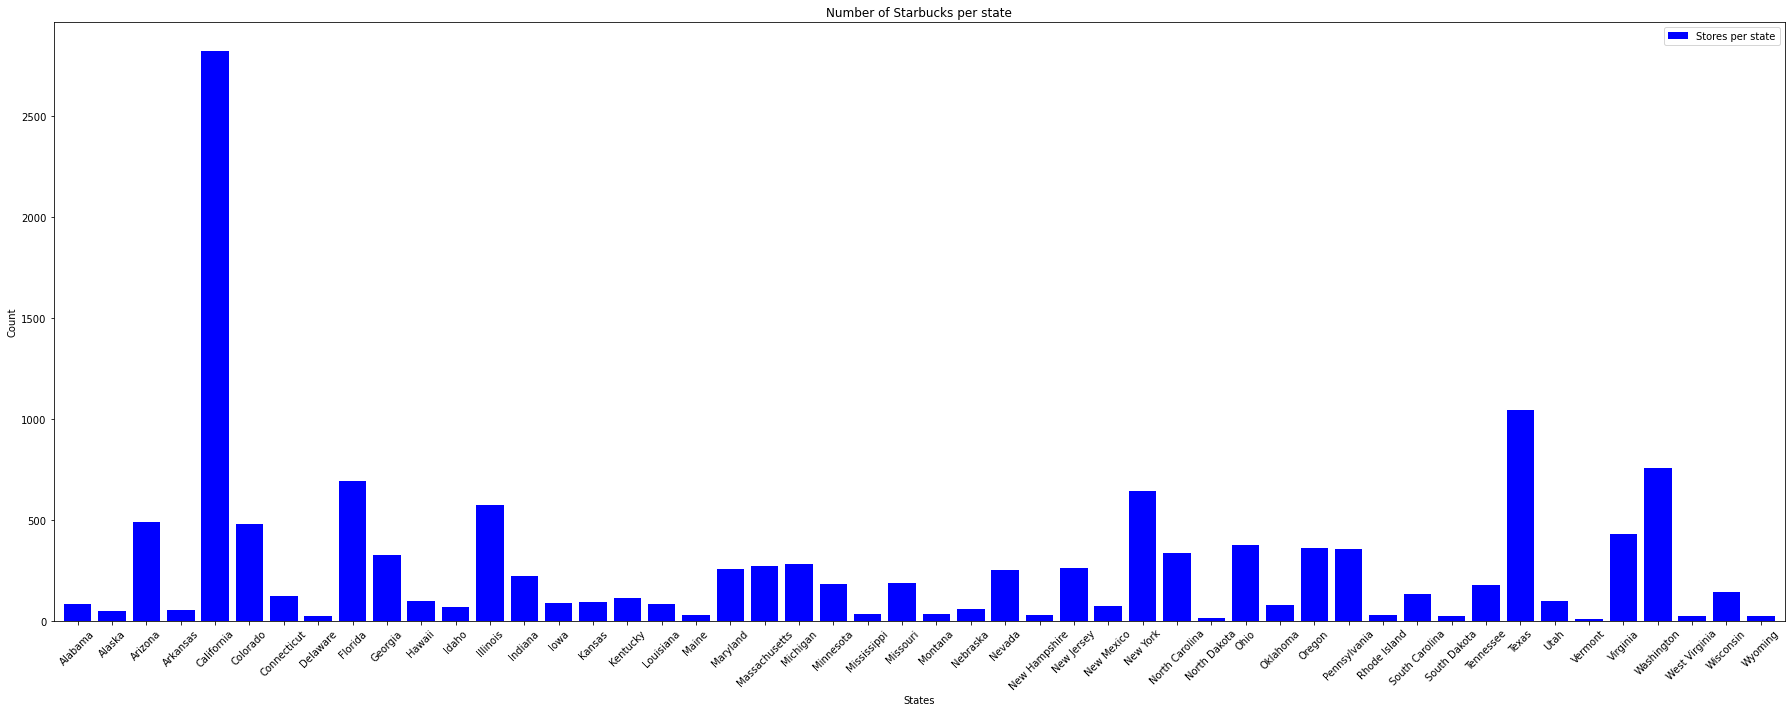

In [26]:
#Create a dataframe grouping by state group
state_group = final_df.groupby('State')

#Dataframe to count the number of Starbucks number
store_number = pd.DataFrame(state_group['Store Number'].count())

#Set x axis and tick locations
x_axis = np.arange(len(store_number))
width = 0.40
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,10))
plt.bar(x_axis, store_number["Store Number"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, list(store_number.index), rotation=45)

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(store_number["Store Number"])*1.05)

#Set a Title and labels
plt.title("Number of Starbucks per state")
plt.xlabel("States")
plt.ylabel("Count")

#Create a legend
legend_name = ["Stores per state"]
plt.legend(legend_name,loc="best")


# Save the figure
plt.tight_layout()
plt.savefig("images/stores_per_state.png")
plt.show()

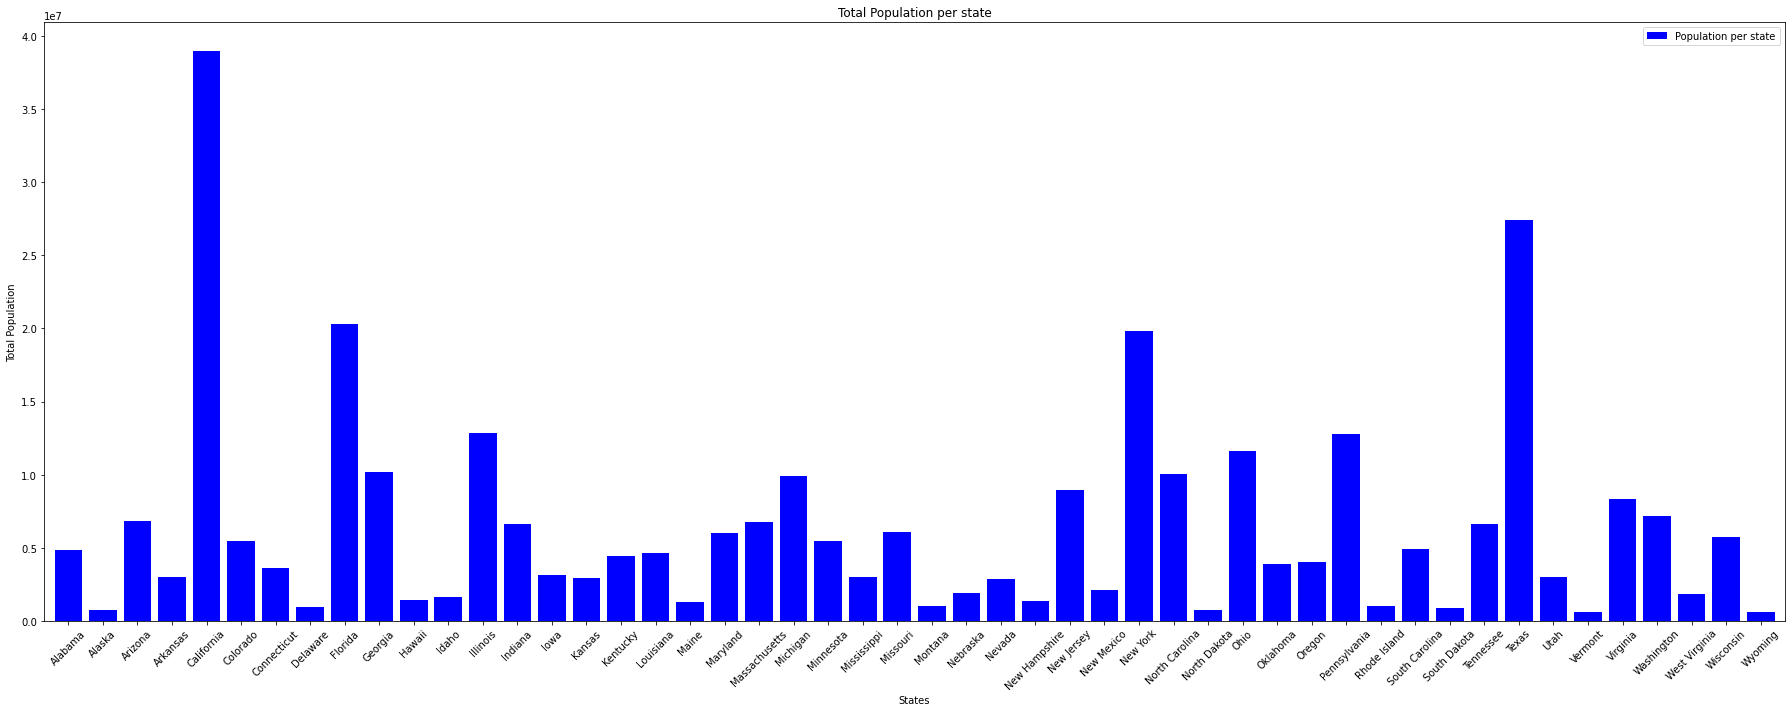

In [27]:
#Create a dataframe grouping by state group
state_group = merge_df.groupby('State')

#Dataframe to count the number of total population
population_df = pd.DataFrame(state_group['TotalPop'].sum())



x_axis = np.arange(len(population_df))
width = 0.40
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,10))
plt.bar(x_axis, population_df["TotalPop"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, list(population_df.index), rotation=45)

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(population_df["TotalPop"])*1.05)

#Set a Title and labels
plt.title("Total Population per state")
plt.xlabel("States")
plt.ylabel("Total Population")

#Create a legend
legend_name = ["Population per state"]
plt.legend(legend_name,loc="best")


# Save the figure
plt.tight_layout()
plt.savefig("images/population_per_state.png")
plt.show()

In [28]:
from config import api_key
import gmaps

ModuleNotFoundError: No module named 'gmaps'

In [ ]:
gmaps.configure(api_key=api_key)

In [ ]:
final_groupby = final_df.groupby("State")
Store_count_map = final_groupby.count()["Store Number"]
Avg_map = final_groupby.mean()[["Longitude", "Latitude", "TotalPop"]]

In [ ]:
locations = Avg_map[["Latitude","Longitude"]]
marker_locations = final_df[["Latitude","Longitude"]]

In [ ]:
TotalPop_map = Avg_map["TotalPop"]
TotalPop_map.head()

In [ ]:
heat_layer = gmaps.heatmap_layer(locations,weights=Store_count_map,point_radius=50,max_intensity=300)
fig=gmaps.figure()
fig.add_layer(heat_layer)
fig

In [ ]:
marker_layer = gmaps.marker_layer(marker_locations)
fig=gmaps.figure()
fig.add_layer(marker_layer)
fig